# 데이터 다운로드 및 업로드
## healthcare-dataset-stroke-data.csv 파일을 다운로드 받기
### https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

1. 데이터 로딩
2. EDA
-  피처간 상관관계 보기
-  카운트 플랏
3. 데이터 전처리
- 불필요한 Feature 제거
- 결측치 처리
- 문자열 데이터 숫자로 인코딩
4. 머신러닝 모델 만들기
- 학습/테스트 데이터 준비하기
- 학습모델 학습하기
5. 성능평가
- 모델 테스트하기
- 성능 평가하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 데이터 로딩

In [194]:
df = pd.read_csv('ml_datas/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 데이터 분석

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 불필요한 Feature 제거

In [7]:
# id column drop
df = df.drop(["id"], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA(탐색적 데이터 분석)
- 데이터 통계량 확인하기
- 데이터의 특징 파악하기
- feature들 간의 상관관계
- feature와 target과의 관계에서 어떤 특징들이 있는지 탐색하기

In [8]:
# 수치형 데이터 통계량 확인하기
df.describe(include=np.number)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 데이터 통계 확인

In [11]:
# 범주형 데이터 컬럼 리스트 추출
cat_cols = list(df.select_dtypes(exclude=np.number).columns)
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [13]:
# 수치형 데이터 컬럼 리스트 추출
num_cols = list(df.select_dtypes(include=np.number).columns)
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [20]:
# 문자형 데이터 통계 확인
df[cat_cols].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [21]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [22]:
# 수치형 데이터 기초 통계 확인
df[num_cols].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [23]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


## 데이터 시각화로 탐색하기

<Axes: xlabel='gender', ylabel='count'>

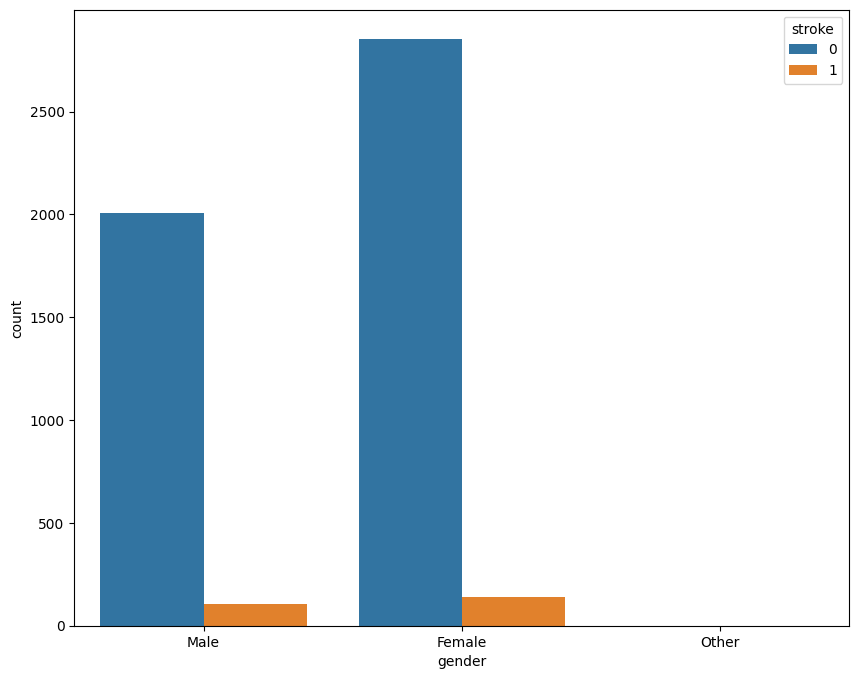

In [29]:
# 성별에 따른 stroke의 0. 1 환자수 카운트 시각화 
plt.figure(figsize=(10,8))
sns.countplot(x="gender", data=df, hue="stroke")

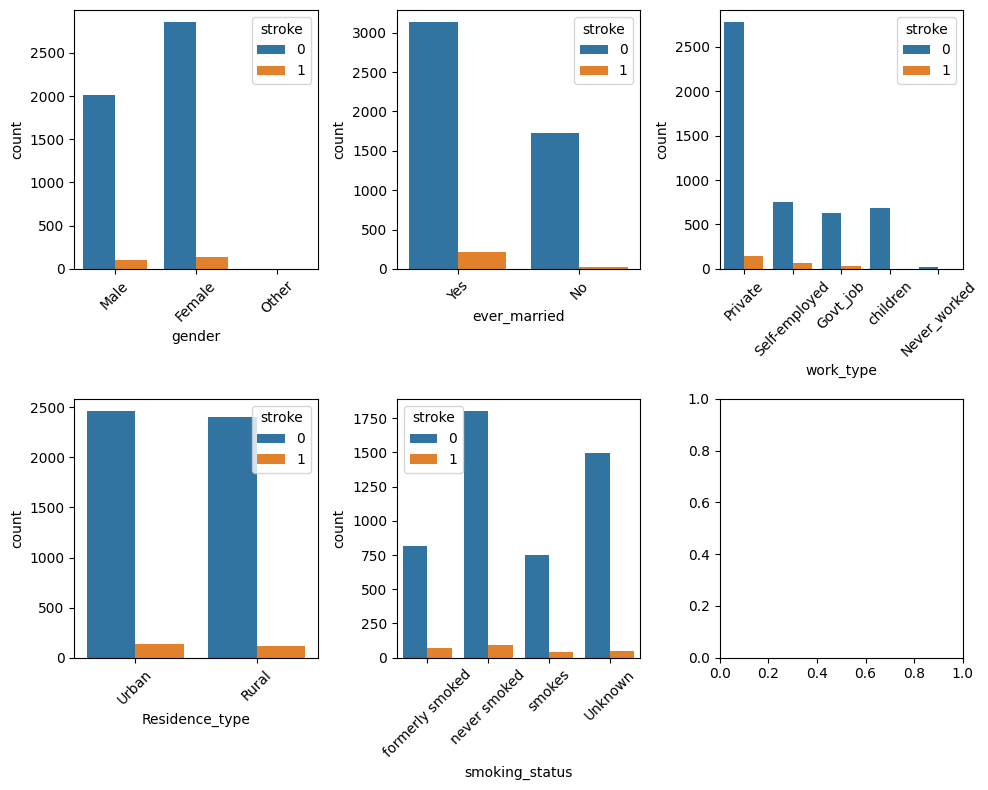

In [106]:
# 문자형 데이터 개별 값과 stroke와의 관계 확인하기
nrows, ncols = 2, 3;
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(10, 8)
ax_list = ax_list_list.reshape(2 * 3)

# 그래프 그리기
for i in range(len(cat_cols)):
    # print(df[i])
    # print(i)
    # print("i/nrows" , i/nrows)
    # print("i%ncols", i%ncols)
    fig = sns.countplot(x=cat_cols[i], data=df, hue="stroke", ax=ax_list[i])
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

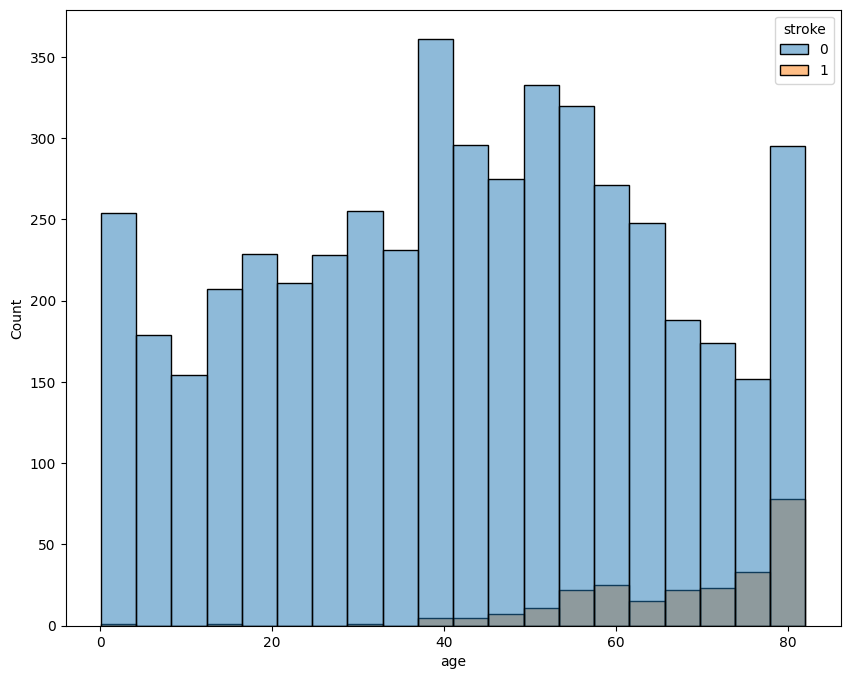

In [107]:
# 나이와 stroke과의 관계 확인하기(histplot())
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="age", hue="stroke")

In [108]:
df['bmi'].count()

4909

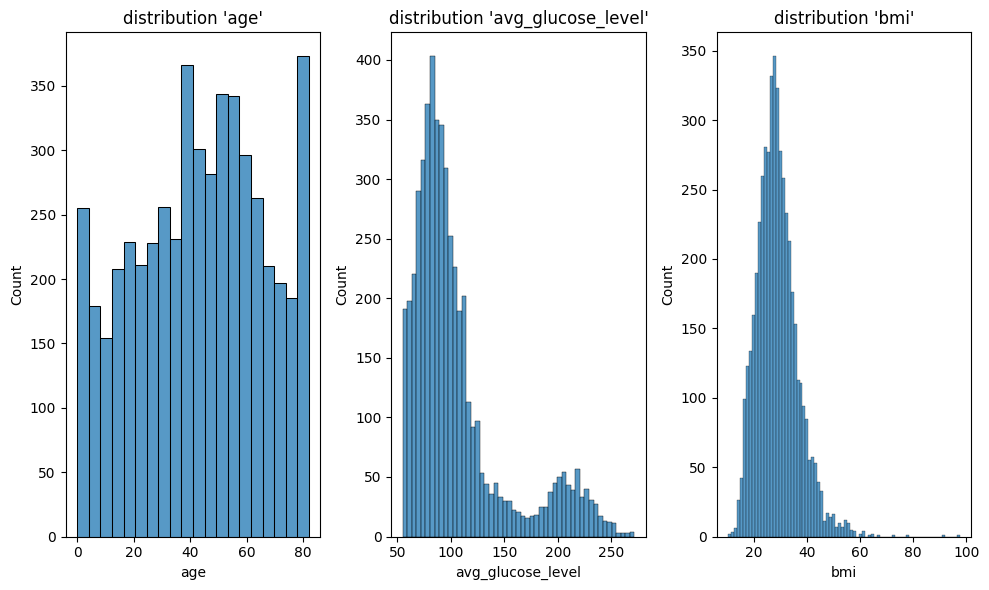

In [129]:
# sns.histplot()으로, 수치형 데이터의 분포 알아보기
num_cols_g = ["age", "avg_glucose_level", "bmi"]
nrows, ncols = 1, 3
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(10, 6)
ax_list = ax_list_list.reshape(1 * 3)


# 그래프 그리기
for i in range(len(num_cols_g)):
    # print(i)
    # print(df[num_cols_g])
    ax = sns.histplot(data=df, x=num_cols_g[i], ax=ax_list[i])
    ax.set_title("distribution '" + num_cols_g[i] + "'")

plt.tight_layout()
plt.show()

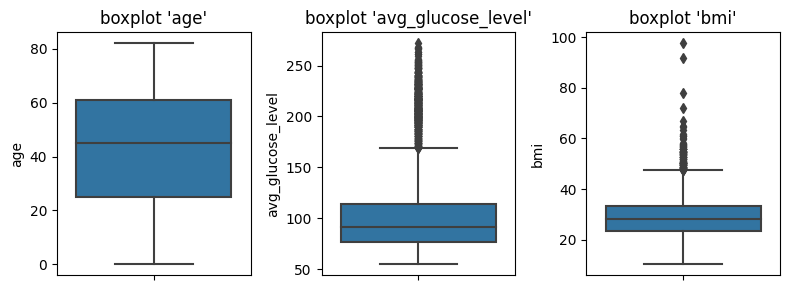

In [167]:
# 통계량은 boxplot으로 살펴보고, sns.boxplots() 활용
nrows, ncols = 1, 3
figure, ax_list_list = plt.subplots(nrows=nrows, ncols=ncols)
figure.set_size_inches(8,3)
ax_list = ax_list_list.reshape(1 * 3)

# 그래프 그리기
for i in range(len(num_cols_g)):
    # print(i)
    # print(df[num_cols_g])
    ax = sns.boxplot(data=df, y=num_cols_g[i], ax=ax_list[i])
    ax.set_title("boxplot '" + num_cols_g[i] + "'")
    
plt.tight_layout()
plt.show()

In [170]:
# 수치형 데이터 피처들간 상관계수 계산
nums_df = df[num_cols]
nums_df
corr = nums_df.corr()

Text(0.5, 1.0, 'Feature Correlation')

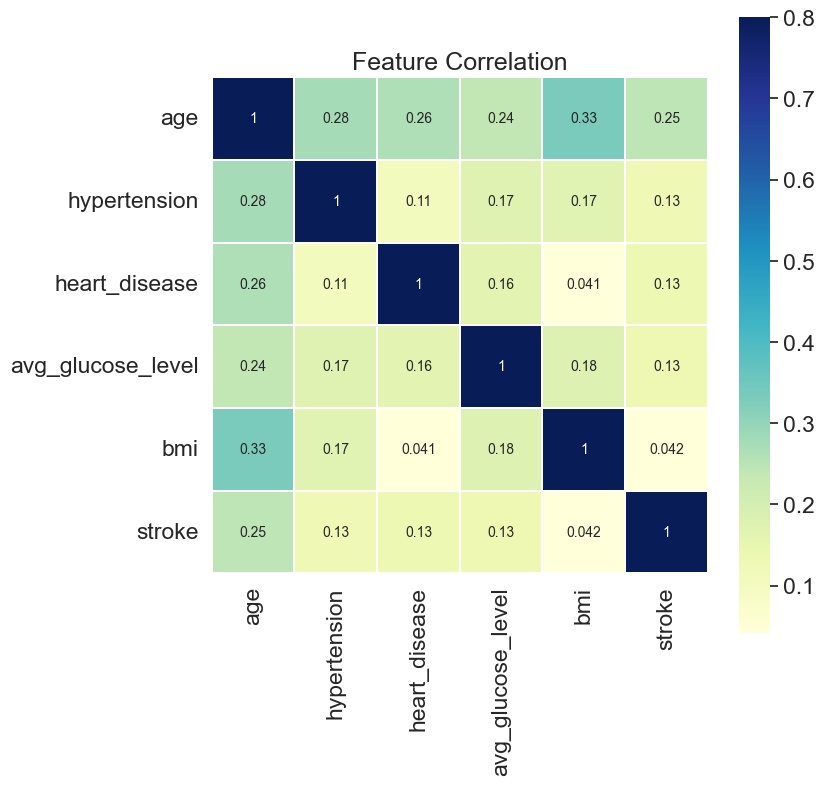

In [176]:
# 피처들간의 상관관계 살펴보기
# vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu'
plt.figure(figsize=(8, 8))

sns.set(font_scale=1.5)
sns.heatmap(
            corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            # fmt = ".2f",
            annot_kws={"size" : 10},
            cmap="YlGnBu"
           );

plt.title('Feature Correlation')

## 결측치 처리하기

In [183]:
# 결측데이터 확인하기
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [213]:
# bmi 컬럼 결측 데이터 평균값으로 채워넣기
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [214]:
df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
work_type_0          0
work_type_1          0
work_type_2          0
work_type_3          0
work_type_4          0
gender_0             0
gender_1             0
gender_2             0
ever_married_0       0
ever_married_1       0
Residence_type_0     0
Residence_type_1     0
smoking_status_0     0
smoking_status_1     0
smoking_status_2     0
smoking_status_3     0
dtype: int64

## 문자형 데이터 숫자로 encoding하기

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [188]:
df[cat_cols].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [189]:
# LabelEncoder 적용
# 컬럼 : work_type, gender, ever_married, Residence_type, smoking_status
from sklearn.preprocessing import LabelEncoder

In [202]:
pd.get_dummies(df, columns = ['work_type', 'gender', 'ever_married', 'Residence_type', "smoking_status"])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_0,work_type_1,work_type_2,...,gender_1,gender_2,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,9046,67.0,0,1,228.69,36.6,1,False,False,True,...,True,False,False,True,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,NaN,1,False,False,False,...,False,False,False,True,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,False,False,True,...,True,False,False,True,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,...,False,False,False,True,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,False,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,False,False,True,...,False,False,False,True,False,True,False,False,True,False
5106,44873,81.0,0,0,125.20,40.0,0,False,False,False,...,False,False,False,True,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,False,False,False,...,False,False,False,True,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,False,False,True,...,True,False,False,True,True,False,False,True,False,False


In [201]:
le = LabelEncoder()

df['work_type'] = le.fit_transform(df["work_type"])
df['gender'] = le.fit_transform(df["gender"])
df['ever_married'] = le.fit_transform(df["ever_married"])
df['Residence_type'] = le.fit_transform(df["Residence_type"])
df['smoking_status'] = le.fit_transform(df["smoking_status"])

In [200]:
df_test = pd.DataFrame(df)

df_test["test"] = le.fit_transform(df["gender"])
df_test

pd.get_dummies(df_test, columns = ["gender"])

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,test,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,False,True,False
1,51676,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,True,False,False
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,False,True,False
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,True,False,False
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0,True,False,False
5106,44873,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,True,False,False
5107,19723,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,True,False,False
5108,37544,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,False,True,False


In [205]:
df = pd.get_dummies(df, columns = ['work_type', 'gender', 'ever_married', 'Residence_type', "smoking_status"])

In [210]:
df = df.drop(["id"], axis=1)

In [226]:
df.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_0,work_type_1,work_type_2,work_type_3,...,gender_1,gender_2,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,67.0,0,1,228.69,36.600000,1,False,False,True,False,...,True,False,False,True,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,False,True,...,False,False,False,True,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,False,True,False,...,True,False,False,True,True,False,False,False,True,False


## 피처와 타겟 분할

In [248]:
# 독립변수, 설명변수, feature
X = df.drop(["stroke"], axis=1)
# 종속변수, target
y = df["stroke"]

In [249]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4,...,gender_1,gender_2,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3
0,67.0,0,1,228.69,36.600000,False,False,True,False,False,...,True,False,False,True,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,False,False,True,False,False,...,True,False,False,True,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False


In [250]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [219]:
from sklearn.model_selection import train_test_split

In [251]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2023)

In [245]:
train_y = train_y.astype(int)

## 모델 학습, 테스트, 정확도 확인
- Decision Tree

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [246]:
print(test_y.astype(int))
print(y_pred)

3547    25
873     39
391     22
608     29
3783    22
        ..
5       29
2263    28
1347    27
3549    28
3336    32
Name: bmi, Length: 1533, dtype: int32
[35 63 36 ... 34 52 75]


In [252]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_X, train_y)
y_pred = dt_clf.predict(test_X)

accuracy = accuracy_score(test_y, y_pred)
print('accuracy :', accuracy)

accuracy : 0.9158512720156555


In [253]:
from sklearn.metrics import classification_report

In [255]:
# classification_report() 결과 출력
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1457
           1       0.16      0.17      0.17        76

    accuracy                           0.92      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.92      0.92      0.92      1533



### RandomForestClassifier()

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf_clf = RandomForestClassifier()
rf_clf.fit(train_X, train_y)


y_pred = rf_clf.predict(test_X)
score = accuracy_score(test_y, y_pred)
# baseline - 랜덤 포레스트(Random Forest) Accuracy : 0.8533352086922887
print('랜덤 포레스트(Random Forest) Accuracy :', score)

랜덤 포레스트(Random Forest) Accuracy : 0.9497716894977168


In [259]:
# classification_report() 결과 출력
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.50      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



## XGBClassifier
- https://xgboost.readthedocs.io/en/stable/
- 한글 정리문서 : https://wooono.tistory.com/97
- XGBClassifer()

In [260]:
from xgboost import XGBClassifier
# xgb_clf = XGBClassifier()

In [263]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_X, train_y)

pred_y = xgb_clf.predict(test_X)
score = accuracy_score(test_y, pred_y)

In [264]:
print('XGBClassifier Accuracy: ', score)

XGBClassifier Accuracy:  0.9452054794520548


In [266]:
# 평가 레포트
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



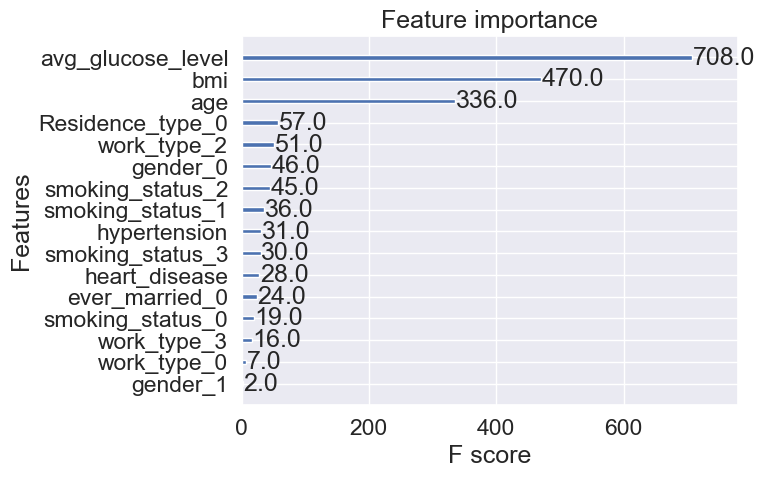

In [267]:
#xgboost의 강력한 기능 Feature Importance 확인
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_clf)
pyplot.show()

## Light GBM
- 공식 문서 : https://lightgbm.readthedocs.io/en/v3.3.2/
- pip install lightgmb

### light GBM

In [268]:
import lightgbm as lgb

In [272]:
lit_gbm = lgb.LGBMClassifier()

In [281]:
lit_gbm.fit(train_X, train_y)

pred_y_lgb = lit_gbm.predict(test_X)
accuracy = accuracy_score(test_y, pred_y_lgb)

In [282]:
print('lightgbm accuracy :', accuracy)

lightgbm accuracy : 0.9497716894977168


In [283]:
# 평가 레포트
print(classification_report(test_y, pred_y_lgb))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.46      0.08      0.13        76

    accuracy                           0.95      1533
   macro avg       0.71      0.54      0.55      1533
weighted avg       0.93      0.95      0.93      1533

